### Multiple Linear Regression - Scikit Implementation
#### Data: Weather-Szeged: Kaggle

In [1]:
#importing necessary packages
import pandas as pd

In [2]:
#importing data
weather = pd.read_csv('C:\\Users\\Rakib\\Downloads\\Completed Projects -- Machine Learning IBM\\Regression Data Set Kaggle\\weatherHistory.csv')

    ##Some descriptive statistics

In [3]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [4]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [6]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 96453 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null float64
Visibility (km)             96453 non-null float64
Loud Cover                  96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [15]:
weather.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [11]:
weather.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


    ##Don't notice much correlation between variables - still going forward
### Some Visualization

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

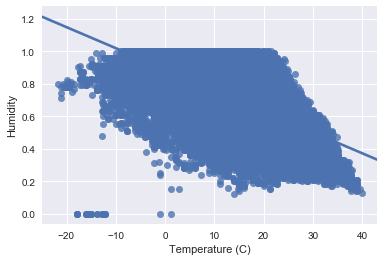

In [8]:
sns.regplot(x="Temperature (C)", y="Humidity", data=weather)

In [9]:
weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

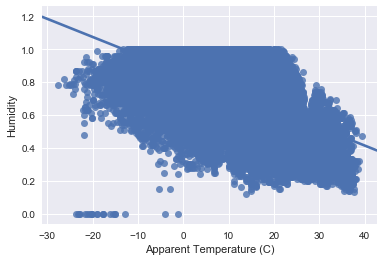

In [12]:
sns.regplot(x="Apparent Temperature (C)", y="Humidity", data=weather)

    ##can we predict humidity based on Temperature and Apparent Temperature

### Spliting data set

In [16]:
feature = weather[["Apparent Temperature (C)", "Temperature (C)"]]

In [17]:
target = weather["Humidity"]

In [18]:
feature.head()

,Apparent Temperature (C),Temperature (C)
0,7.388889,9.472222
1,7.227778,9.355556
2,9.377778,9.377778
3,5.944444,8.288889
4,6.977778,8.755556


In [19]:
target.head()

0    0.89
1    0.86
2    0.89
3    0.83
4    0.83
Name: Humidity, dtype: float64

## Scikit Implementation

In [22]:
from sklearn.model_selection import train_test_split

In [42]:
#spliting data set
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=101)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67517, 2)
(28936, 2)
(67517,)
(28936,)


In [20]:
#importing linear model
from sklearn import linear_model

In [21]:
regr = linear_model.LinearRegression()

    #converting data into array

In [25]:
X_train = np.asanyarray(X_train)

In [26]:
y_train = np.asanyarray(y_train)

In [27]:
X_train

array([[  1.3       ,   3.85555556],
       [  6.23888889,   7.25      ],
       [ 15.53333333,  15.53333333],
       ..., 
       [ 11.66666667,  11.66666667],
       [ 19.44444444,  19.44444444],
       [  5.1       ,   7.17777778]])

In [28]:
y_train

array([ 0.3 ,  0.89,  0.82, ...,  0.96,  0.62,  0.92])

## Fitting regression model

In [29]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
regr.coef_

array([ 0.03148473, -0.04791749])

## Predictions

In [31]:
y_hat = regr.predict(X_test)

### Evaluation

In [32]:
from sklearn.metrics import r2_score

In [41]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f", np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_hat, y_test))

Mean absolute error: 0.12
Residual sum of squares (MSE): %.2f 0.02166094115635865
R2-score: -0.27
